In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data =pd.read_csv(r"C:\Users\karan\Downloads\IPL_2025_Dataset (2).csv")
Data.head()

,match_id,season,team1,team2,winner,venue,toss_winner,toss_decision,runs_team1,runs_team2,wickets_team1,wickets_team2,overs,player_of_match,match_result,date
0,1,2025,MI,KKR,MI,MA Chidambaram Stadium,KKR,field,233,119,5,10,20,Rohit Sharma,win,2025-03-23
1,2,2025,DC,PBKS,PBKS,M Chinnaswamy Stadium,PBKS,bat,170,171,5,9,20,KL Rahul,win,2025-03-24
2,3,2025,PBKS,KKR,PBKS,PCA Stadium,PBKS,field,152,151,9,7,20,MS Dhoni,win,2025-03-25
3,4,2025,RCB,CSK,RCB,Rajiv Gandhi Stadium,RCB,bat,227,193,4,5,20,Rohit Sharma,win,2025-03-26
4,5,2025,PBKS,DC,DC,Ekana Stadium,PBKS,field,148,216,10,6,20,Virat Kohli,win,2025-03-27


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   match_id         74 non-null     int64 
 1   season           74 non-null     int64 
 2   team1            74 non-null     object
 3   team2            74 non-null     object
 4   winner           74 non-null     object
 5   venue            74 non-null     object
 6   toss_winner      74 non-null     object
 7   toss_decision    74 non-null     object
 8   runs_team1       74 non-null     int64 
 9   runs_team2       74 non-null     int64 
 10  wickets_team1    74 non-null     int64 
 11  wickets_team2    74 non-null     int64 
 12  overs            74 non-null     int64 
 13  player_of_match  74 non-null     object
 14  match_result     74 non-null     object
 15  date             74 non-null     object
dtypes: int64(7), object(9)
memory usage: 9.4+ KB


In [4]:
Data.describe()

,match_id,season,runs_team1,runs_team2,wickets_team1,wickets_team2,overs
count,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.0
mean,37.500000,2025.0,179.824324,164.824324,6.797297,6.635135,20.0
std,21.505813,0.0,35.135884,36.564208,2.269390,2.302913,0.0
min,1.000000,2025.0,120.000000,100.000000,3.000000,3.000000,20.0
25%,19.250000,2025.0,152.000000,133.000000,5.000000,5.000000,20.0
50%,37.500000,2025.0,181.500000,167.000000,7.000000,7.000000,20.0
75%,55.750000,2025.0,208.750000,195.750000,9.000000,9.000000,20.0
max,74.000000,2025.0,236.000000,230.000000,10.000000,10.000000,20.0


In [5]:
print(f"Your Number of row are {Data.shape[0]} Your Number of column are {Data.shape[1]}")

Your Number of row are 74 Your Number of column are 16


In [6]:
Missing_data = Data.isnull().sum().sum()

if Missing_data > 0:
    print("Fill missing value")
else:
    print("Nothing to fill")


Nothing to fill


In [7]:
data = Data.dropna(subset=['winner'])
data.head()

,match_id,season,team1,team2,winner,venue,toss_winner,toss_decision,runs_team1,runs_team2,wickets_team1,wickets_team2,overs,player_of_match,match_result,date
0,1,2025,MI,KKR,MI,MA Chidambaram Stadium,KKR,field,233,119,5,10,20,Rohit Sharma,win,2025-03-23
1,2,2025,DC,PBKS,PBKS,M Chinnaswamy Stadium,PBKS,bat,170,171,5,9,20,KL Rahul,win,2025-03-24
2,3,2025,PBKS,KKR,PBKS,PCA Stadium,PBKS,field,152,151,9,7,20,MS Dhoni,win,2025-03-25
3,4,2025,RCB,CSK,RCB,Rajiv Gandhi Stadium,RCB,bat,227,193,4,5,20,Rohit Sharma,win,2025-03-26
4,5,2025,PBKS,DC,DC,Ekana Stadium,PBKS,field,148,216,10,6,20,Virat Kohli,win,2025-03-27


In [8]:
winner_team =data['winner'].value_counts()
print(winner_team)

winner
MI      13
LSG     10
GT       8
RCB      8
KKR      7
SRH      7
CSK      6
DC       6
RR       5
PBKS     4
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='player_of_match'>

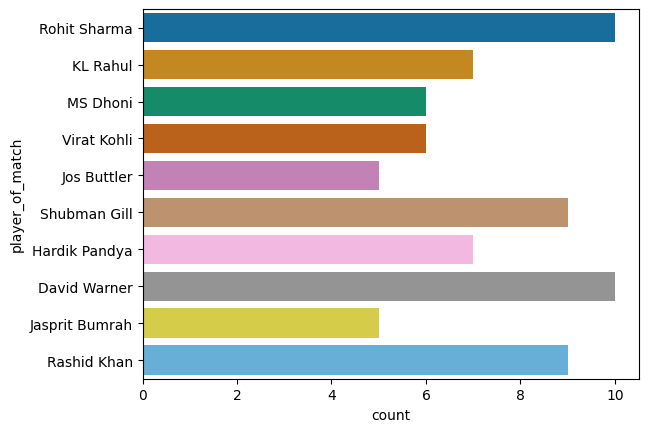

In [9]:
sns.countplot(y=data['player_of_match'],palette='colorblind')

Text(0.5, 1.0, 'Toss decision count')

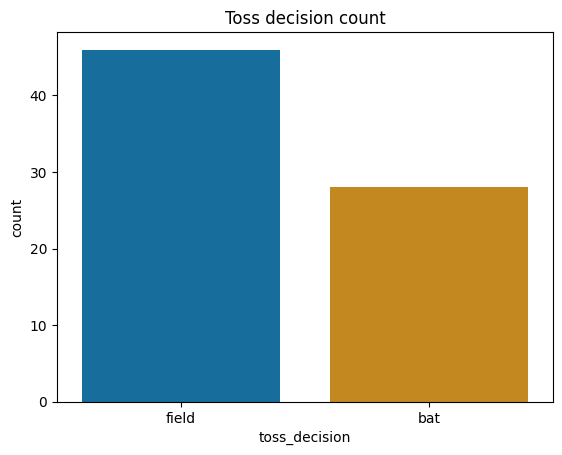

In [10]:
sns.countplot(x=data['toss_decision'],palette='colorblind')
plt.title('Toss decision count')

Text(0.5, 1.0, 'Most winner teams')

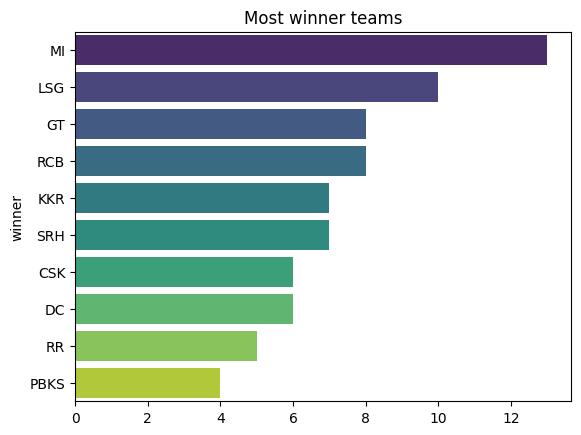

In [11]:
match_winner =data['winner'].value_counts()
sns.barplot(y=match_winner.index ,x=match_winner.values,palette="viridis")
plt.title("Most winner teams")

In [12]:
dataset = data[data['winner'] == data['toss_winner']].shape[0]
percentage = (dataset * 100) / data.shape[0]
percentage = round(percentage, 2)

percentage

44.59

In [23]:
#Highest score by Team-1 & who won those matches
highscore = (
    data.groupby('runs_team1')['winner']
    .value_counts()
    .sort_index(ascending=False)
)
highscore


runs_team1  winner
236         RCB       1
235         MI        2
233         MI        1
232         PBKS      1
229         SRH       1
                     ..
125         SRH       1
123         MI        1
122         RR        1
121         GT        1
120         RR        1
Name: count, Length: 71, dtype: int64

In [24]:
highscore = (
    data[data['winner'] == data['team1']]
    .groupby('runs_team1')
    .size()
    .sort_index(ascending=False)
)
highscore


runs_team1
236    1
235    2
233    1
232    1
229    2
227    2
226    1
224    1
222    2
221    1
220    1
217    2
209    1
208    1
202    1
201    1
200    2
192    1
185    2
184    1
180    1
179    1
177    1
174    1
170    1
167    1
164    1
155    1
154    1
152    2
144    1
133    1
130    1
121    1
dtype: int64

In [25]:
venuecount =data['venue'].value_counts()
venuecount

venue
Rajiv Gandhi Stadium      12
Narendra Modi Stadium     10
M Chinnaswamy Stadium      9
MA Chidambaram Stadium     9
Ekana Stadium              7
PCA Stadium                7
Eden Gardens               6
Arun Jaitley Stadium       6
Wankhede Stadium           4
Sawai Mansingh Stadium     4
Name: count, dtype: int64

<Axes: ylabel='venue'>

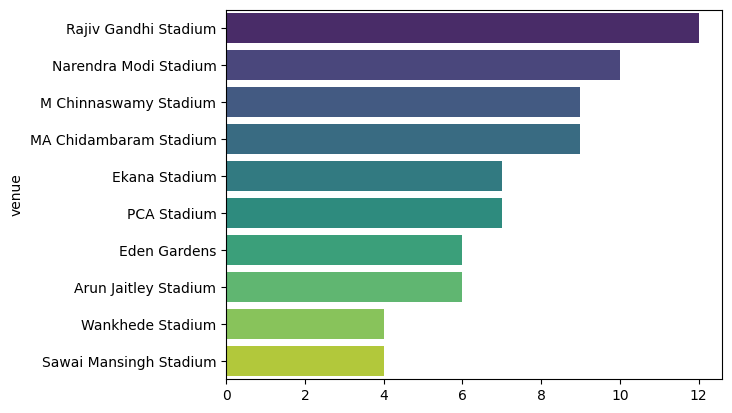

In [29]:
sns.barplot(y= venuecount.index ,x=venuecount.values,palette="viridis")
